In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
print('libraries imported!')

libraries imported!


In [176]:
%matplotlib inline

In [177]:
df = pd.read_csv('emission data.csv',
                index_col=0)
df = pd.DataFrame(df)
df.head()

,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
Africa,0,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
Albania,0,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
Algeria,0,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
Americas (other),0,0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [219]:
df['2017'].sort_values(ascending=False).head()

227    1.580000e+12
220    3.990000e+11
64     3.530000e+11
45     2.000000e+11
13     1.780000e+11
Name: 2017, dtype: float64

In [179]:
top_10 = df.loc[['United States', 'Canada', 'Russia', 'China', 'India','Germany', 'United Kingdom',\
       'Japan', 'France', 'Poland', 'World']]
years = np.arange(1968,2018,1)

Text(0.5, 1.0, 'CO2 Emmission in last 50 years for top 5 Emmitors')

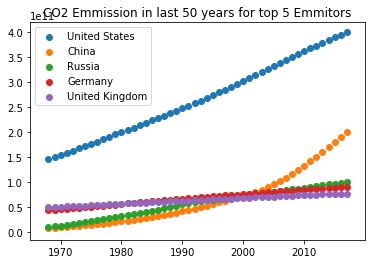

In [181]:
def Scatter(x, item):
    return plt.scatter(x, new[item][-50:], label= item)
for item in new.columns:
    Scatter(years, item)
    plt.legend()
plt.title('CO2 Emmission in last 50 years for top 5 Emmitors')

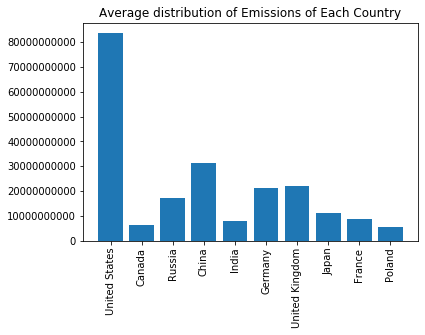

In [182]:
new = top_10.transpose()
new.drop(columns='World', inplace=True)
plt.bar(new.columns,new.describe().mean())
plt.title('Average distribution of Emissions of Each Country')
plt.xticks(rotation=90)
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

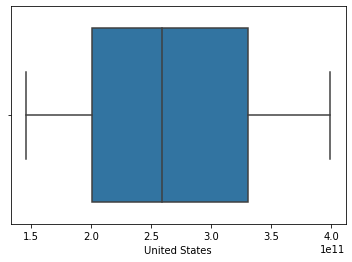

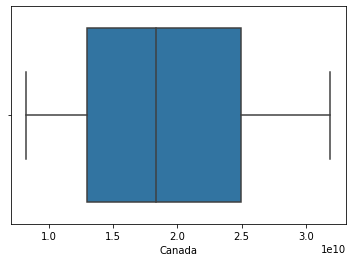

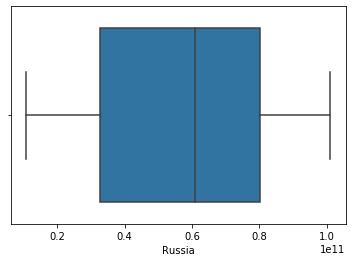

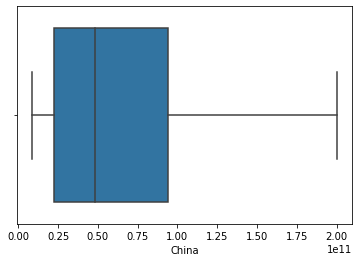

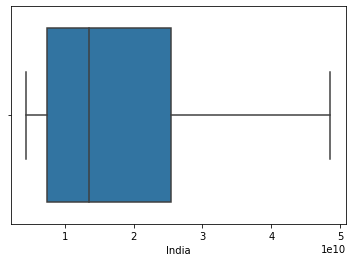

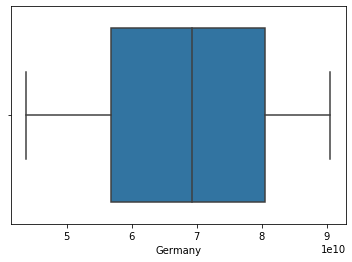

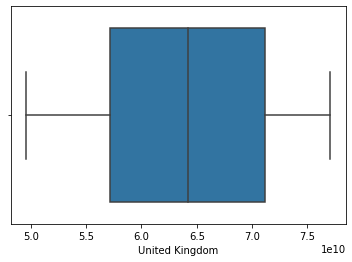

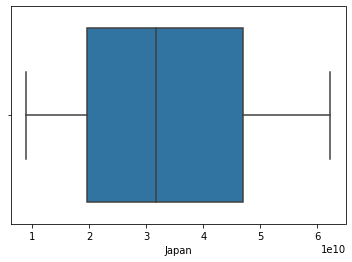

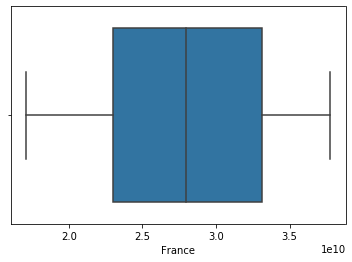

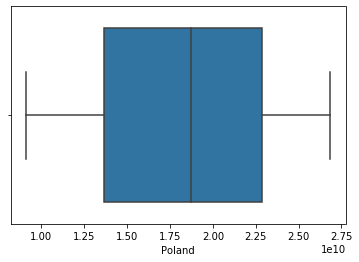

In [183]:
for item in new.columns:
    sns.boxplot(x = new[item][-50:])
    plt.show()

In [216]:
df = pd.read_csv(r'C:\Users\clyde\OneDrive\Documents\Stackskill\emission data.csv')
df = pd.DataFrame(df)

import pycountry
pycountry.countries.search_fuzzy(df.Country.iloc[0])[0].alpha_3
some_countries = ["England", "HerpaDerpaland", "Engla"]

def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_3
    except:
        return np.nan

for country in some_countries:
    do_fuzzy_search(country)
    
df['Country_code'] = df["Country"].apply(lambda country: do_fuzzy_search(country))

import plotly.express as px
plot_df = df.dropna()
fig = px.choropleth(plot_df, locations="Country_code",
                    color="2017",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title = '2017 Emission Data')
fig.show()